In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [64]:
known_piRNAs_GDA = pd.read_csv("piRNAs_GDA.csv", sep="\t", header=0)
known_piRNAs_GDA = known_piRNAs_GDA.drop(columns=["Name", "main"])
known_piRNAs_GDA = known_piRNAs_GDA[known_piRNAs_GDA.columns.sort_values()]
known_piRNAs_GDA.index = known_piRNAs_GDA["Locus"]
known_piRNAs_GDA = known_piRNAs_GDA.drop(columns=["Locus"])
print(known_piRNAs_GDA.columns)
known_piRNAs_GDA.columns = [i for i in range(1,10)]
print("IDs are unique:",len([piRNA_ID.split(":")[0] for piRNA_ID in known_piRNAs_GDA.index.to_list()]) == len(np.unique([piRNA_ID.split(":")[0] for piRNA_ID in known_piRNAs_GDA.index.to_list()])))
known_piRNAs_GDA.index = [piRNA_ID.split(":")[0] for piRNA_ID in known_piRNAs_GDA.index.to_list()]
known_piRNAs_GDA.columns = ["JEG", "JFC", "JMV", "KEG", "KFC", "KMV", "AEG", "AFC", "AMV"]
display(known_piRNAs_GDA.head())

Index(['mapped_JMS_EG_sRNA_S5_L001_R1', 'mapped_JMS_FC1_sRNA_S6_L001_R1',
       'mapped_JMS_MvL_sRNA_S4_L001_R1', 'mapped_KG_EG_sRNA_S9_L001_R1',
       'mapped_KG_FC_sRNA_S8_L001_R1', 'mapped_KG_MvL1_sRNA_S7_L001_R1',
       'mapped_KGplus_EG1_sRNA_S10_L001_R1',
       'mapped_KGplus_FC_sRNA_S11_L001_R1',
       'mapped_KGplus_MvL_sRNA_S12_L001_R1'],
      dtype='object')
IDs are unique: True


,JEG,JFC,JMV,KEG,KFC,KMV,AEG,AFC,AMV
piR-dme-62476,57,18,73,14853,16837,22141,48,24,63
piR-dme-64569,207,95,195,62,94,117,106,77,101
piR-dme-78513,57319,33873,59042,25366,33649,42629,36238,29491,37925
piR-dme-88591,163,81,138,52,78,68,59,89,87
piR-dme-92195,7053,4010,7191,2714,3950,5443,5724,3017,4882


In [65]:
all_miRNAs = pd.read_csv("GDA_all_miRNA_counts_raw.csv", index_col=0, sep ="\t")
miRNAs_counts = all_miRNAs.sum(axis=0).to_list()

In [66]:
pred_piRNAs = pd.read_csv("counts_predicted_piRNAs.csv", index_col=0, sep = "\t")
pred_piRNAs = pred_piRNAs.drop(columns=["Seqs"])

In [67]:
FINAL_COUNTS = pd.concat([known_piRNAs_GDA,all_miRNAs,pred_piRNAs])
FINAL_COUNTS.to_csv("all_identified_predicted_RNAs.csv", sep = "\t")

In [68]:
piRNAs_counts = FINAL_COUNTS.loc[FINAL_COUNTS.index.str.contains("piR"),:].sum(axis=0).to_list()

In [69]:
all_piRNAs = FINAL_COUNTS.loc[FINAL_COUNTS.index.str.contains("piR"),:]

Text(0.5, 1.0, 'Raw Count of small RNAs')

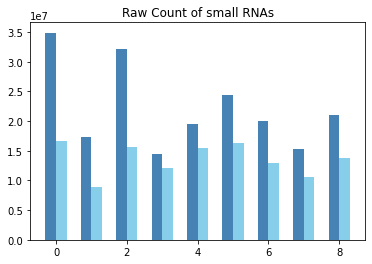

In [70]:
x_axis = np.arange(9)
plt.bar(x_axis-0.15,miRNAs_counts,width=0.3,label="miRNAs",color="steelblue")
plt.bar(x_axis+0.15,piRNAs_counts,width=0.3,label="piRNAs",color="skyblue")
plt.title("Raw Count of small RNAs")


In [71]:
miRNAs_percentage = [(m/(m+p))*100 for m, p in zip(miRNAs_counts,piRNAs_counts)]
piRNAs_percentage = [(p/(m+p))*100 for m, p in zip(miRNAs_counts,piRNAs_counts)]


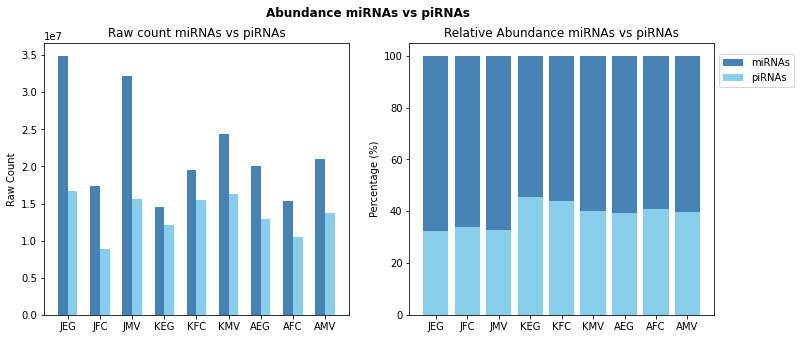

In [72]:
fig, (raw, relative) = plt.subplots(1,2, figsize=(12,5))
x_axis = np.arange(9)
relative.bar(FINAL_COUNTS.columns, miRNAs_percentage, bottom=piRNAs_percentage, label = "miRNAs", color="steelblue")
relative.bar(FINAL_COUNTS.columns, piRNAs_percentage, label = "piRNAs", color="skyblue")
relative.set_title("Relative Abundance miRNAs vs piRNAs")
relative.set_ylabel("Percentage (%)")
raw.bar(x_axis-0.15,miRNAs_counts,width=0.3,label="miRNAs",color="steelblue")
raw.bar(x_axis+0.15,piRNAs_counts,width=0.3,label="piRNAs",color="skyblue")
raw.set_ylabel("Raw Count")
raw.set_title("Raw count miRNAs vs piRNAs")
raw.set_xticks(x_axis)
raw.set_xticklabels(FINAL_COUNTS.columns)
relative.legend(loc="center left",bbox_to_anchor=(1,0.9))
fig.suptitle("Abundance miRNAs vs piRNAs", weight="bold", size="large")
plt.show()
fig.savefig("/home/madelarambelje/results/GDA_predicted_known.pdf", format="pdf",bbox_inches='tight')


In [73]:
sample_group = [["JEG","JFC","JMV"],["KEG","KFC","KMV"],["AEG","AFC","AMV"]]
miRNAs_count_per_group = []
piRNAs_count_per_group = []
perc_miRNAs = []
perc_piRNAs = []
for group in sample_group:
    miRNAs_g = 0
    piRNAs_g = 0
    for s in group:
        miRNAs_g += all_miRNAs[s].sum()
        piRNAs_g += all_piRNAs[s].sum()
    miRNAs_count_per_group.append(miRNAs_g)
    piRNAs_count_per_group.append(piRNAs_g)
    perc_miRNAs.append(miRNAs_g / (miRNAs_g + piRNAs_g)*100)
    perc_piRNAs.append(piRNAs_g / (miRNAs_g + piRNAs_g)*100)


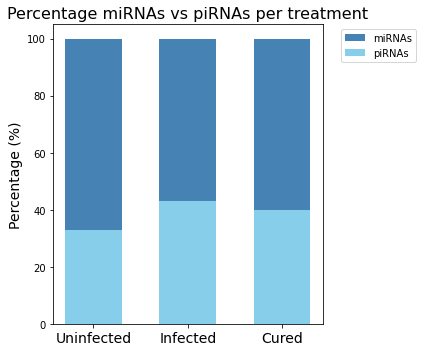

In [87]:
plt.figure(figsize=(6,5))
plt.bar(["Uninfected", "Infected", "Cured"], perc_miRNAs, bottom=perc_piRNAs, label = "miRNAs", color="steelblue",width=0.6)
plt.bar(["Uninfected", "Infected", "Cured"], perc_piRNAs, label = "piRNAs", color="skyblue",width=0.6)
plt.ylabel("Percentage (%)", fontsize=14)
plt.xticks(fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.title("Percentage miRNAs vs piRNAs per treatment", fontsize=16)
plt.tight_layout()
plt.savefig("group_piRNAs_miRNAs.png", dpi=150,format="png",transparent=True)
plt.show()
